In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Load data
airports = pd.read_csv("../airports.csv", delimiter=',')
routes = pd.read_csv("../routes.csv", delimiter=',')
#print(airports)
#print(routes)

# Mismatch between airports ID in both tables ಠ_ಠ ??
#print(airportsColombia[airportsColombia['iata_code'] == 'BOG'])
#routes[routes['Source airport'] == 'BOG']

In [3]:
# Filter only arports
airports = airports[(airports['type'] == 'small_airport') | (airports['type'] == 'medium_airport') | (airports['type'] == 'large_airport')]

# Keep only information about airports
routes = routes.drop(['Airline','Airline ID','Codeshare','Stops','Equipment', "Source airport ID", "Destination airport ID"], axis=1)
routes = routes.rename(columns={"Source airport": "source_airport", "Destination airport": "destination_airport"})

In [4]:
# Filter colombian airports
aeroColombia = airports[airports['iso_country'] == 'CO']
airportsColombia = aeroColombia[(aeroColombia['type'] == 'small_airport') | (aeroColombia['type'] == 'medium_airport') | (aeroColombia['type'] == 'large_airport')]
airportsColombia = airportsColombia.reset_index()
airportsColombia = airportsColombia.drop(['elevation_ft','continent','iso_country', 'iso_region', 'scheduled_service', 'wikipedia_link', 'keywords', 'home_link', 'local_code', 'index'], axis=1)
airportsColombia

,id,ident,type,name,latitude_deg,longitude_deg,municipality,gps_code,iata_code
0,41025,ACM,small_airport,Arica Airport,-2.144851,-71.758389,Arica,NaN,ACM
1,40810,AGI,small_airport,El Paraíso Airport,8.128611,-73.584722,Aguachica,NaN,NaN
2,43979,CO-0001,small_airport,Punta Espada Airport,12.075256,-71.125725,Uribia,NaN,NaN
3,316785,CO-0052,small_airport,Loreto North Airstrip,-3.524000,-70.328000,NaN,NaN,NaN
4,317261,CO-0054,small_airport,Ríohacha Highway Strip,11.498800,-72.989200,Ríohacha,NaN,NaN
...,...,...,...,...,...,...,...,...,...
655,6176,SKVP,medium_airport,Alfonso López Pumarejo Airport,10.435000,-73.249500,Valledupar,SKVP,VUP
656,6177,SKVV,medium_airport,Vanguardia Airport,4.167870,-73.613800,Villavicencio,SKVV,VVC
657,30667,SKYA,small_airport,Yaguara Airport,1.544170,-73.933300,San Vicente Del Caguán,SKYA,AYG
658,6178,SKYP,medium_airport,El Yopal Airport,5.319110,-72.384000,El Yopal,SKYP,EYP


In [5]:
# Filter over airports with iata code
airportsColombia = airportsColombia[airportsColombia['iata_code'].notna()]
airportsColombia = airportsColombia.reset_index()
airportsColombia = airportsColombia.drop(['index'], axis=1)
airportsColombia

,id,ident,type,name,latitude_deg,longitude_deg,municipality,gps_code,iata_code
0,41025,ACM,small_airport,Arica Airport,-2.144851,-71.758389,Arica,NaN,ACM
1,41597,CO-LCR,small_airport,La Chorrera Airport,-0.733333,-73.016670,La Chorrera,NaN,LCR
2,32342,CO-SNT,small_airport,Las Cruces Airport,7.383220,-73.505402,Sabana De Torres,NaN,SNT
3,35319,CO-TCD,small_airport,Tarapacá Airport,-2.895802,-69.749762,Tarapacá,SKRA,TCD
4,41037,SK-002,small_airport,El Encanto Airport,-1.753333,-73.204722,El Encanto,NaN,ECO
...,...,...,...,...,...,...,...,...,...
136,6175,SKVL,small_airport,Velásquez Airport,5.939040,-74.457000,Puerto Boyacá,SKVL,PYA
137,6176,SKVP,medium_airport,Alfonso López Pumarejo Airport,10.435000,-73.249500,Valledupar,SKVP,VUP
138,6177,SKVV,medium_airport,Vanguardia Airport,4.167870,-73.613800,Villavicencio,SKVV,VVC
139,30667,SKYA,small_airport,Yaguara Airport,1.544170,-73.933300,San Vicente Del Caguán,SKYA,AYG


In [19]:
# Routes involving colombian airports
routesColombia = pd.DataFrame(columns = ['source_airport', 'destination_airport'])

for i in range(len(airportsColombia)):
    
    requestedairport = airportsColombia.loc[i, 'iata_code']
    
    # Maybe some routes are not in both directions
    found1 = routes[routes['source_airport'] == requestedairport]
    found2 = routes[routes['destination_airport'] == requestedairport]
    
    routesColombia = routesColombia.append(found1)
    routesColombia = routesColombia.append(found2)
    
routesColombia = routesColombia.drop_duplicates()
routesColombia = routesColombia.reset_index()
routesColombia = routesColombia.drop(['index'], axis=1)
routesColombia

,source_airport,destination_airport
0,LCR,ACR
1,LCR,LET
2,ACR,LCR
3,LET,LCR
4,TCD,LET
...,...,...
275,UIO,MDE
276,RVE,TME
277,TME,RVE
278,ADZ,PTY


In [20]:
routesColombia['source_airport_name'] =  np.nan
routesColombia['source_airport_lat'] =  np.nan
routesColombia['source_airport_lng'] =  np.nan
routesColombia['source_airport_country'] =  np.nan


routesColombia['destination_airport_name'] =  np.nan
routesColombia['destination_airport_lat'] =  np.nan
routesColombia['destination_airport_lng'] =  np.nan
routesColombia['destination_airport_country'] =  np.nan


# Completing data 
for i in range(len(routesColombia)):
    
    requested_source_airport = routesColombia.loc[i, 'source_airport']
    requested_destination_airport = routesColombia.loc[i, 'destination_airport']
    
    source_airport = airports[airports['iata_code'] == requested_source_airport]
    destination_airport = airports[airports['iata_code'] == requested_destination_airport]
    
    routesColombia.loc[i, 'source_airport_name'] = source_airport['name'].values[0]
    routesColombia.loc[i, 'source_airport_lat'] = source_airport['latitude_deg'].values[0]
    routesColombia.loc[i, 'source_airport_lng'] = source_airport['longitude_deg'].values[0]
    routesColombia.loc[i, 'source_airport_country'] =  source_airport['iso_country'].values[0]

    routesColombia.loc[i, 'destination_airport_name'] = destination_airport['name'].values[0]
    routesColombia.loc[i, 'destination_airport_lat'] = destination_airport['latitude_deg'].values[0]
    routesColombia.loc[i, 'destination_airport_lng'] = destination_airport['longitude_deg'].values[0]
    routesColombia.loc[i, 'destination_airport_country'] =  destination_airport['iso_country'].values[0]

routesColombia

,source_airport,destination_airport,source_airport_name,source_airport_lat,source_airport_lng,source_airport_country,destination_airport_name,destination_airport_lat,destination_airport_lng,destination_airport_country
0,LCR,ACR,La Chorrera Airport,-0.733333,-73.016670,CO,Araracuara Airport,-0.600854,-72.398011,CO
1,LCR,LET,La Chorrera Airport,-0.733333,-73.016670,CO,Alfredo Vásquez Cobo International Airport,-4.193550,-69.943200,CO
2,ACR,LCR,Araracuara Airport,-0.600854,-72.398011,CO,La Chorrera Airport,-0.733333,-73.016670,CO
3,LET,LCR,Alfredo Vásquez Cobo International Airport,-4.193550,-69.943200,CO,La Chorrera Airport,-0.733333,-73.016670,CO
4,TCD,LET,Tarapacá Airport,-2.895802,-69.749762,CO,Alfredo Vásquez Cobo International Airport,-4.193550,-69.943200,CO
...,...,...,...,...,...,...,...,...,...,...
275,UIO,MDE,Mariscal Sucre International Airport,-0.125399,-78.354306,EC,Jose Maria Córdova International Airport,6.164540,-75.423100,CO
276,RVE,TME,Los Colonizadores Airport,6.951868,-71.857179,CO,Gustavo Vargas Airport,6.451080,-71.760300,CO
277,TME,RVE,Gustavo Vargas Airport,6.451080,-71.760300,CO,Los Colonizadores Airport,6.951868,-71.857179,CO
278,ADZ,PTY,Gustavo Rojas Pinilla International Airport,12.583600,-81.711200,CO,Tocumen International Airport,9.071360,-79.383499,PA


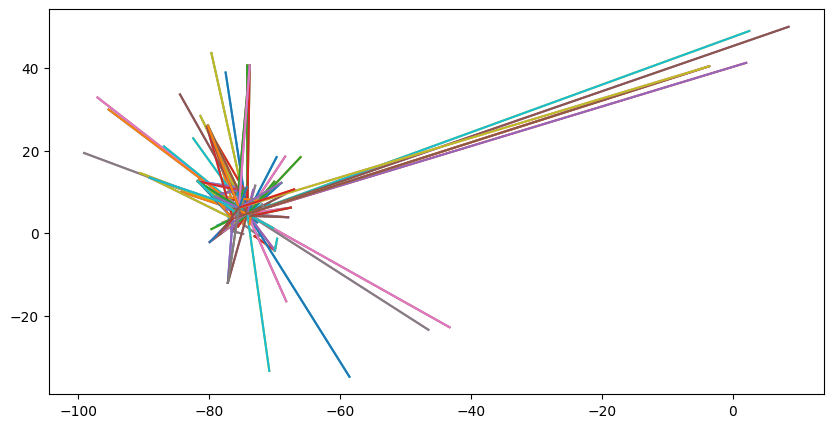

In [39]:
lati = routesColombia.source_airport_lat.to_numpy()
lngi = routesColombia.source_airport_lng.to_numpy()
latf = routesColombia.destination_airport_lat.to_numpy()
lngf = routesColombia.destination_airport_lng.to_numpy()

fig = plt.figure(figsize=(10,5))

for i in range(len(lati)):
    plt.plot([lngi[i], lngf[i]], [lati[i], latf[i]] , '-')

In [44]:
datajson = []

for i in range(len(lati)):
    
    datajson.append({ "lati": lati[i], "lngi": lngi[i], "latf": latf[i], "lngf": lngf[i]})
        
save_file = open("flights.json", "w") 
json.dump(datajson, save_file, indent = 6) 
save_file.close()  

In [53]:
airports2 = pd.read_csv("../airports2.csv", delimiter=',', names=['id', 'name', 'city', 'country', 'iata','icao', 'lat', 'long', 'altitude', 'timezone','dst', 'tz', 'type', 'source'])
routes2 = pd.read_csv("../routes2.csv", delimiter=',')

#print(airports2)
#print(routes2)

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67658,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67659,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67660,ZM,19016,FRU,2912,OSS,2913,NaN,0,734
